<a href="https://colab.research.google.com/github/CorentinMAG/AI/blob/master/linear_regression_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
#chargement des données
house_data = pd.read_csv('house_data.csv')
print(house_data.describe())

#on supprime les lignes ou il y a des valeurs manquantes
house_data = house_data.dropna()
house_data = house_data.reset_index(drop = True)

              price     surface  arrondissement
count    827.000000  822.000000      822.000000
mean    2007.342201   58.045925        4.142336
std     1890.894229   44.827522        3.202151
min      390.000000   10.000000        1.000000
25%     1050.000000   28.655000        2.000000
50%     1567.000000   46.100000        3.000000
75%     2346.000000   73.000000        4.000000
max    25000.000000  415.000000       10.000000


[]

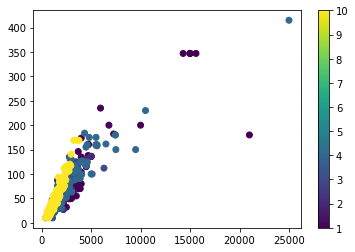

In [3]:
plt.scatter(house_data['price'],house_data['surface'],c=house_data['arrondissement'])
plt.colorbar()
plt.plot()

On voit effectivement une relation linéaire se dégager.
On voit aussi que le système ne semble plus linéaire quand le loyer est au dessus de 10 000€
Affichons maintenant le loyer en fonction de l'arrondissement

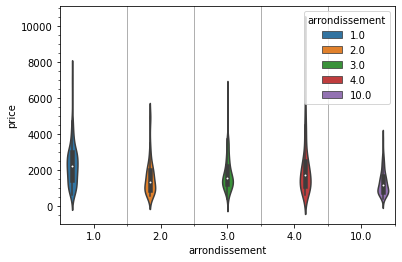

In [4]:
#on retire les données avec un loyer > 10 000€
house_data = house_data[house_data['price']<10000]

#on réordonne les index
house_data = house_data.reset_index(drop = True)

ax1 = sns.violinplot("arrondissement", "price", data=house_data, hue='arrondissement')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

La répartition des prix semble a peu près la même, avec moins de loyers élévés (+volatiles) dans le 10ème

<IPython.core.display.Javascript object>


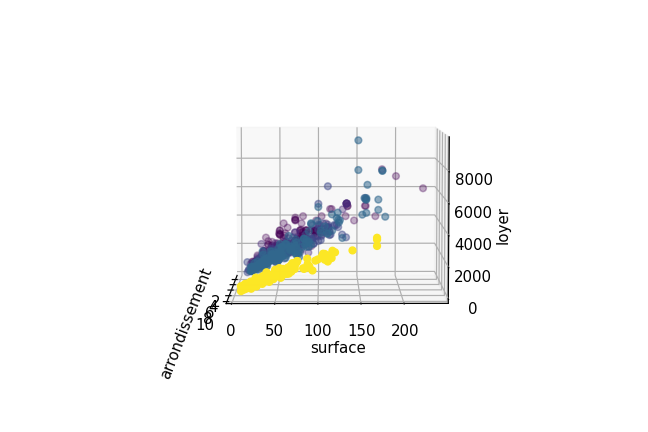

In [17]:
%matplotlib nbagg 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure().gca(projection='3d')

fig.scatter(house_data['arrondissement'], house_data['surface'], house_data['price'], c=house_data['arrondissement'], cmap="viridis")
fig.set_xlabel('arrondissement')
fig.set_ylabel('surface')
fig.set_zlabel('loyer')
plt.show()

On va effectuer une régression specifique sur chaque arrondissement, pour avoir plus de précision. D'abord, séparation jeu de données d'entraînement / jeu de données test

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(house_data[["surface", "arrondissement"]], house_data[["price"]], test_size=0.3)

On crée le modèle de régression linéaire, le loyer en fonction de la surface

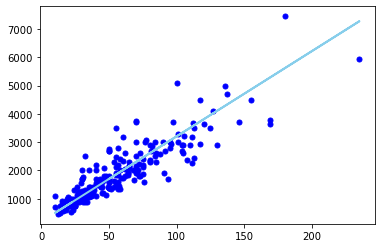

In [7]:
lr = LinearRegression()
lr_baseline = lr.fit(xtrain[["surface"]], ytrain)
baseline_pred = lr_baseline.predict(xtest[["surface"]])

plt.plot(xtest["surface"], ytest, 'bo', markersize = 5)
plt.plot(xtest["surface"], baseline_pred, color="skyblue", linewidth = 2)

On regarde rapidement le R<sup>2</sup> de la régression

In [8]:
def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

score_bl = r2score(baseline_pred[:,0], ytest['price'])

print(score_bl)

0.7835156204697005


In [9]:
lrs = []
for i in np.unique(xtrain["arrondissement"]):
    # On génère un jeu de données par arrondissement
    train_arr = xtrain['arrondissement']==i
    test_arr = xtest['arrondissement']==i
    
    xtrain_arr = xtrain[train_arr]
    ytrain_arr = ytrain[train_arr]

    xtest_arr = xtest[test_arr]
    ytest_arr = ytest[test_arr]

    lr = LinearRegression()
    lr.fit(xtrain_arr[["surface"]], ytrain_arr)
    lrs.append(lr)

On effectue la prédiction finale sur le jeu de données test avec notre nouveau modèle, qui combine les différents modèles par arrondissement

In [10]:
final_pred = []

for idx,val in xtest.iterrows():
    v = int(val["arrondissement"])
    if v==10:
        v=5
    final_pred.append(lrs[v-1].predict([[val["surface"]]])[0][0])
r2score(final_pred, ytest["price"])

0.8350254810600487

On peut afficher cette prédiction finale, la courbe de regression pour chaque arrondissement

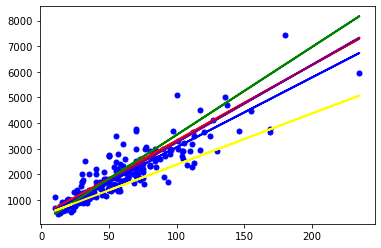

In [13]:
plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["surface"]], lrs[0].predict(xtest[["surface"]]), color="red", linewidth = 2) #1er
plt.plot(xtest[["surface"]], lrs[1].predict(xtest[["surface"]]), color="purple", linewidth = 2) #2ième
plt.plot(xtest[["surface"]], lrs[2].predict(xtest[["surface"]]), color="blue", linewidth = 2) #3ième
plt.plot(xtest[["surface"]], lrs[3].predict(xtest[["surface"]]), color="green", linewidth = 2) #4ième
plt.plot(xtest[["surface"]], lrs[4].predict(xtest[["surface"]]), color="yellow", linewidth = 2) #10ième